In [1]:
# Intro to Machine Learning

# Machine Learning is about extracting information from data.

# A First Application:Classifying iris Specis

By assuming that you've already knowledge of Python and some scientific libs like Numpy,Scipy and matplotlib let's get started...

# Know Your Data

In [2]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [3]:
#The iris dataset that is returned by load_iris is a Bunch object, which is very
# similar to a dictionary. It contains keys and values
print('Keys: \n{}'.format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193])

Keys: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att


In [4]:
print('Target names: {}'.format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print('Feature names: {}'.format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print('Shape of data: {}'.format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [7]:
print('Type of data: {}'.format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


we see that array contains 150 different flowers. That individual items is called Sample in Machine Learning


In [8]:
print('First five columns of data:\n {}'.format(iris_dataset['data'][:5]))

First five columns of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


From the above data we can clrealy see that first five flowers with petal of 0.2cm and the first flower of have longest sepal 5.1cm

The target array contains the species of each of the flowers that were measured, also as a Numpy Array

In [9]:
print('Type of target:\n {}'.format(type(iris_dataset['target'])))
print('Shape of target: {}'.format(iris_dataset['target'].shape))

Type of target:
 <class 'numpy.ndarray'>
Shape of target: (150,)


In [10]:
print('Target:\n {}'.format(iris_dataset['target']))

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meaning of numbers are given by the iris['target_names'] array:
    0 means setosa, 1 means vesicolor, and 2 means virginica

# Measuring Success: Training and Testing Data

We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements.

We cannot use the data we used to build the model to evaluate it. This is because our model can always simply remember the whole training set, and will therefore always predict the correct label for any point in the training set. 

To assess the model’s performance, we show it new data (data that it hasn’t seen before) for which we have labels. This is usually done by splitting the labeled data we have collected (here, our 150 flower measurements) into two parts. One part of the data is used to build our machine learning model, and is called the training data or training set. The rest of the data will be used to assess how well the model works; this is called the test data, test set, or hold-out set.

In [11]:
# Call train_test_split to divide data into training and testing set

from sklearn.model_selection import train_test_split

# Data is denoted by X and labels are denoted by y.
X_train,X_test,y_train,y_test=train_test_split(
    iris_dataset['data'],
    iris_dataset['target'],
    random_state=0)

In [12]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [13]:
print('X_train shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (38, 4)
y_test shape: (38,)


# First thing first: Looking at your data

One of the best way to inspect data is to visualize it.
By using Scatter-Plot we can do this easily.

Scatter Plot: A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point.

In [16]:
# First we have to convert Numpy array into Pandas dataframe.
#Pandas has a function to create pair plots called scatter_matrix.
import pandas as pd
import mglearn
# Create DF from data in X_train
# Label the column using the strings in irir_dataset.feature_names
iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
print('Generated dataframe:\n {}'.format(iris_dataframe.head()))

Generated dataframe:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.9               3.0                4.2               1.5
1                5.8               2.6                4.0               1.2
2                6.8               3.0                5.5               2.1
3                4.7               3.2                1.3               0.2
4                6.9               3.1                5.1               2.3


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


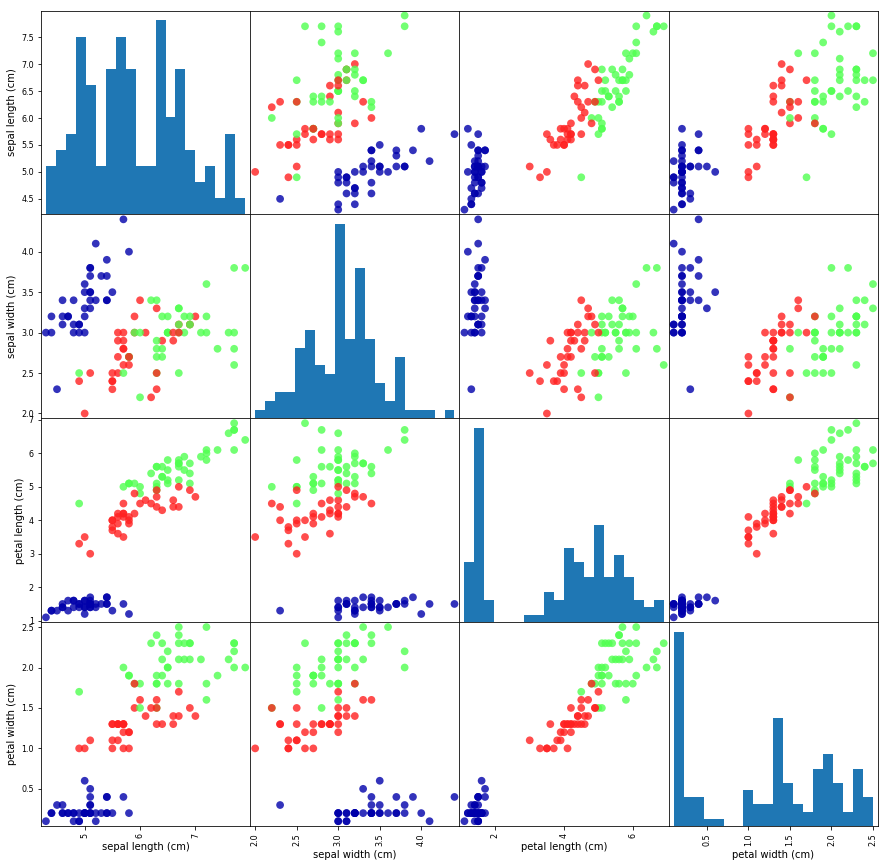

In [27]:
# create a scatter matrix from the dataframe color by y_train
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

From the plots, we can see that the three classes seem to be relatively well seperated using the sepal and petal measurements. This means that machine learning model will likely be able to learn to seperated them.

# Building First Model: k-Nearest Neighbors

There are many classification algorithms in scikit-learn that we could use. Here we will use a k-nearest neighbors classifier, which is easy to understand. Building this model only consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1) #i.e., k=1

To build the model on the training set, we call the fit method of the knn object which takes as arguments the Numpy array X_train contaning training data and the Numpy array y_train containing label corresponding to training data

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Printing a scikit-learn model can yield very long strings, but don’t be intimidated by these. We will cover all the important parameters later. In the remainder of this book, we will not show the output of fit because it doesn’t contain any new information

# Making Predictions
Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [39]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [45]:
prediction=knn.predict(X_new)
print('Prediction: {}'.format(X_new))
print('New data is closest to: {}'.format(iris_dataset['data'][prediction]))
print('Prediction target name: {}'.format(iris_dataset['target_names'][prediction]))

Prediction: [[5.  2.9 1.  0.2]]
New data is closest to: [[5.1 3.5 1.4 0.2]]
Prediction target name: ['setosa']


# Evaluating the Model
This is where the test set that we created earlier comes in.Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by computing the accuracy,

In [47]:
y_prediction=knn.predict(X_test)
print('Test set prediction: {}'.format(y_prediction))

Test set prediction: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [49]:
print('Train test score: {:.2f}'.format(np.mean(y_prediction==y_test)))

Train test score: 0.97


We can also use score method of knn object to compute accuracy

In [50]:
print('Test set score: {:.2f}'.format(knn.score(X_test,y_test)))

Test set score: 0.97
